## CHATBOT PENYAKIT TANAMAN BERBASIS BAHASA INDONESIA DENGAN MODEL INDOBERT

In [ ]:
# !pip install transformers

In [1]:
import json
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import time

2. Mengambil Dataset

In [3]:
#Memasukkan path data train
path = Path('train_new_agro(5).json')

#Membuka file .json
with open(path, 'r') as f:
    squad_dict = json.load(f)

texts = []
queries = []
answers = []

#Pencocokan konteks, pertanyaan, dan jawaban
for group in squad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
#Menyimpan konteks, pertanyaan, dan jawaban ke dalam list
                texts.append(context)
                queries.append(question)
                answers.append(answer)

train_texts, train_queries, train_answers = texts[:int(len(texts) * 0.9)], queries[:int(len(queries) * 0.9)], answers[:int(len(answers) * 0.9)]
val_texts, val_queries, val_answers = texts[int(len(texts) * 0.9):], queries[int(len(queries) * 0.9):], answers[int(len(answers) * 0.9):]


In [ ]:
#Memasukkan path data validation
#path = Path('/content/val_agrobase (1).json')

#Membuka file .json
#with open(path, 'r') as f:
#    squad_dict = json.load(f)

#texts = []
#queries = []
#answers = []

#Pencocokan konteks, pertanyaan, dan jawaban
#for group in squad_dict['data']:
#    for passage in group['paragraphs']:
#        context = passage['context']
#        for qa in passage['qas']:
#            question = qa['question']
#            for answer in qa['answers']:
#Menyimpan konteks, pertanyaan, dan jawaban ke dalam list
#                texts.append(context)
#                queries.append(question)
#                answers.append(answer)

#val_texts, val_queries, val_answers = texts, queries, answers

3. Cek Data

In [4]:
#Jumlah Data Train
print(len(train_texts))
print(len(train_queries))
print(len(train_answers))

177
177
177


In [5]:
a = 1

print("Konteks: ",train_texts[a])
print("Pertanyaan: ",train_queries[a])
print("Jawaban: ",train_answers[a])



Konteks:  Hama dan penyakit tumbuhan merupakan jenis organisme pengganggu tumbuhan (OPT), selain gulma. Serangan hama dan penyakit pada tanaman dapat menyebabkan kerugian besar pada tanaman dan dapat mengancam perekonomian petani. Penyebaran hama dan penyakit tanaman meningkat drastis dalam beberapa tahun terakhir. Hama dan penyakit tanaman mudah menyebar ke beberapa negara dan mencapai proporsi epidemi. Belalang, lalat buah, ulat grayak, penyakit antaknose, fuso, penyakit virus kerdil, busuk buah adalah beberapa hama dan penyakit tanaman yang paling merusak. Tiga cara penyebaran hama dan penyakit tanaman yaitu dengan cara: 1) perdagangan atau migrasi 2) pengaruh lingkungan, seperti faktor cuaca, angin, percikan air hujan, dan 3) faktor biotik berupa: serangga atau vektor lainnya.
Pertanyaan:  Apa saja beberapa hama dan penyakit tanaman yang merusak?
Jawaban:  {'answer_start': 227, 'answer_end': 574, 'text': 'Belalang, lalat buah, ulat grayak, penyakit antaknose, fuso, penyakit virus k

In [6]:
#Jumlah Data Validation
print(len(val_texts))
print(len(val_queries))
print(len(val_answers))

20
20
20


In [7]:
b = 2

print("Konteks: ",val_texts[b])
print("Pertanyaan: ",val_queries[b])
print("Jawaban: ",val_answers[b])

Konteks:  Daun tanaman yang digorok oleh lalat penggorok daun ini membentuk alur-alur pada daun tanaman tomat. Lalat penggorok daun merupakan serangga dari ordo Diptera di mana serangga ini memiliki sayap yang termodifikasi yang disebut dengan halter. Modifikasi sayap terjadi pada sayap belakang, yang berfungsi sebagai keseimbangan. Serangga memiliki tubuh yang mengkilap, berwarna kuning keemasan. Gejala pada daun tanaman dapat dilihat pada daun tanaman yang paling banyak diserang. Imago akan meletakkan telur pada daun tanaman, kemudian telur akan menetas. Larva-larva yang menetas kemudian masuk ke jaringan daun. Larva memakan daun dengan meninggal jaringan epidermis atas dan bawah daun. Lalu larva membuat alur-alur pada daun, alur-alur tersebut akan berhenti sampai larva menjadi pupa. Pupa yang terbentuk pada bagian ujung dari alur tersebut. Apabila pupa terbentuk bagian ujung alur memiliki ujung yang besar. Hal ini dikarenakan semakin besar larva yang terbentuk di alur tersebut. Akib

4. Penentuan end index

In [8]:
for answer, text in zip(train_answers, train_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']

    def extract_answer_end(text, answer_start):
        end_idx = extract_answer_end(text, answer_start)




In [9]:
answer_starts = []
for answer, text in zip(train_answers, train_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    answer_starts.append(start_idx)


def extract_answer_end(text, answer_start):

    for i in range(len(answer_starts)):
        end_idx = extract_answer_end(text[i], answer_starts[i])




In [10]:
for answer, text in zip(val_answers, val_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    #Nilai end index sebenarnya
    end_idx = start_idx + len(real_answer)

    #Ketika real answer sesuai
    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx
    #Ketika real answer lebih dari 1 karakter
    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1
    #Ketika real answer lebih dari 2 karakter
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2
        #Ketika real answer lebih dari 3 karakter
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 3
        answer['answer_end'] = end_idx - 3

5. Tokenisasi Passages dan Queries

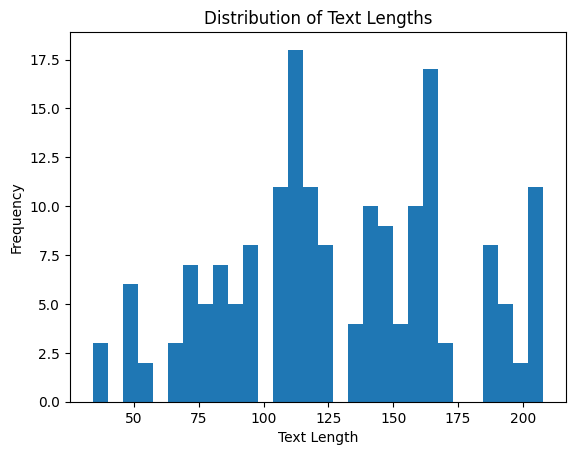

In [11]:
#visualisasi text_lengths
import matplotlib.pyplot as plt

# Ambil panjang teks
text_lengths = [len(text.split()) for text in train_texts]

# Plot histogram panjang teks
plt.hist(text_lengths, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [12]:
import numpy as np

# Ambil Persentasi dari max length
percentile_value = 90

max_length = int(np.percentile(text_lengths, percentile_value))
print(f'Max Length: {max_length}')


Max Length: 187


In [13]:
from transformers import AutoTokenizer, AdamW, BertForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("Rifky/Indobert-QA")


max_length = 187

train_encodings = tokenizer(train_texts, train_queries, truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts, val_queries, truncation=True, padding=True, max_length=max_length)


In [14]:
# Output dari tokenisasi
print("Train Encodings:", train_encodings)
print("Validation Encodings:", val_encodings)

Train Encodings: {'input_ids': [[3, 12696, 1501, 3256, 3702, 1709, 2659, 11120, 3623, 4706, 3702, 12, 3075, 930, 13, 16, 2175, 7438, 2422, 18, 3416, 12696, 1501, 3256, 1560, 4246, 1708, 2641, 5938, 1819, 1560, 4246, 1501, 1708, 6538, 5932, 3993, 18, 7989, 12696, 1501, 3256, 4246, 4068, 12363, 1558, 1841, 1620, 2676, 18, 12696, 1501, 3256, 4246, 3069, 7550, 1500, 1841, 1806, 1501, 2592, 12272, 24565, 18, 26316, 16, 2662, 3221, 16, 19989, 23781, 1484, 16, 3256, 1770, 25406, 10278, 16, 28969, 928, 16, 3256, 5687, 25186, 16, 14202, 3221, 1581, 1841, 12696, 1501, 3256, 4246, 1497, 2323, 6446, 18, 2139, 2407, 7989, 12696, 1501, 3256, 4246, 2125, 1545, 2407, 30, 21, 13, 3962, 1647, 14702, 22, 13, 4546, 3049, 16, 1730, 3916, 7394, 16, 4873, 16, 25049, 2039, 3985, 16, 1501, 23, 13, 3916, 15379, 2788, 3517, 30, 7094, 1647, 21005, 2141, 18, 4, 2064, 1497, 4317, 1545, 12696, 1501, 3256, 4246, 35, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
#visualisasi hasil tokenisasi
for i in range(len(train_texts)):
    input_ids = train_encodings['input_ids'][i]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)

    print(f"Example {i + 1} - Train:")
    print("Original Text:", train_texts[i])
    print("Original Query:", train_queries[i])
    print("Token IDs:", input_ids)
    print("Tokens:", tokens)
    print("Decoded Text:", decoded_text)
    print("="*50)

# Visualisasi hasil tokenisasi untuk data validasi
for i in range(len(val_texts)):
    input_ids = val_encodings['input_ids'][i]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)

    print(f"Example {i + 1} - Validation:")
    print("Original Text:", val_texts[i])
    print("Original Query:", val_queries[i])
    print("Token IDs:", input_ids)
    print("Tokens:", tokens)
    print("Decoded Text:", decoded_text)
    print("="*50)

Example 1 - Train:
Original Text: Hama dan penyakit tumbuhan merupakan jenis organisme pengganggu tumbuhan (OPT), selain gulma. Serangan hama dan penyakit pada tanaman dapat menyebabkan kerugian besar pada tanaman dan dapat mengancam perekonomian petani. Penyebaran hama dan penyakit tanaman meningkat drastis dalam beberapa tahun terakhir. Hama dan penyakit tanaman mudah menyebar ke beberapa negara dan mencapai proporsi epidemi. Belalang, lalat buah, ulat grayak, penyakit antaknose, fuso, penyakit virus kerdil, busuk buah adalah beberapa hama dan penyakit tanaman yang paling merusak. Tiga cara penyebaran hama dan penyakit tanaman yaitu dengan cara: 1) perdagangan atau migrasi 2) pengaruh lingkungan, seperti faktor cuaca, angin, percikan air hujan, dan 3) faktor biotik berupa: serangga atau vektor lainnya.
Original Query: Apa yang dimaksud dengan Hama dan Penyakit Tanaman?
Token IDs: [3, 12696, 1501, 3256, 3702, 1709, 2659, 11120, 3623, 4706, 3702, 12, 3075, 930, 13, 16, 2175, 7438, 2422

6. Convert The Start-End Positions to Tokens Start-End Positions

In [16]:
def add_token_positions(encodings, answers):
    start_positions = []
    end_positions = []

    for i in range(len(answers)):
        start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))

        # Memeriksa apakah 'answer_end' ada dalam kunci jawaban
        if 'answer_end' in answers[i]:
            end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))
        else:
            # Menangani kasus di mana 'answer_end' tidak ada

            end_positions.append(None)

    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

7. Membuat Kelas Dataset

In [17]:
class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) if val[idx] is not None else torch.tensor(-1) for key, val in self.encodings.items()}

        # Print untuk melihat nilai yang menyebabkan masalah
        for key, value in item.items():
            if value is None:
                print(f"None value found for key {key} at index {idx}")

        return item

    def __len__(self):
        return len(self.encodings['input_ids'])


In [18]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [19]:
#Menggunakan Dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [20]:
#Menggunakan GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Working on:', device)

Working on: cpu


8. Membangun Model

In [21]:
model = BertForQuestionAnswering.from_pretrained("Rifky/Indobert-QA").to(device)

#optim = AdamW(model.parameters(), lr=5e-5)
#optim = AdamW(model.parameters(), lr=4e-5)
#optim = AdamW(model.parameters(), lr=3e-5)  #paling bagus
#optim = AdamW(model.parameters(), lr=2e-5)
optim = AdamW(model.parameters(), lr=1e-5)

epochs = 5

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\fajar\.cache\huggingface\hub\models--Rifky--Indobert-QA. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

KeyboardInterrupt: 

9. Train and Evaluate Model

In [ ]:
whole_train_eval_time = time.time()

train_losses = []
val_losses = []

print_every = 10

for epoch in range(epochs):
  epoch_time = time.time()

  #train mode
  model.train()

  loss_of_epoch = 0

  print("############Train############")

  for batch_idx,batch in enumerate(train_loader):

    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    #backwards pass
    loss.backward()
    #update bobot
    optim.step()
    #Hitung nilai loss
    loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
      print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(train_loader)
  train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  #evaluation mode
  model.eval()

  print("############Evaluate############")

  loss_of_epoch = 0

  for batch_idx,batch in enumerate(val_loader):

    with torch.no_grad():

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      start_positions = batch['start_positions'].to(device)
      end_positions = batch['end_positions'].to(device)

      outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
      loss = outputs[0]
      #Hitung nilai loss
      loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
       print("Batch {:} / {:}".format(batch_idx+1,len(val_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(val_loader)
  val_losses.append(loss_of_epoch)

  #Print hasil tiap epoch
  print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nValidation Loss:", val_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))

############Train############


In [ ]:
#Save model

torch.save(model,"model1_")

10. Plot Train & Val Loss

In [ ]:

import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=25)
ax.set_ylabel('Loss', fontsize = 20)
ax.set_xlabel('Epochs', fontsize = 25)
_=ax.plot(train_losses)
_=ax.plot(val_losses)
_=ax.legend(('Train','Val'),loc='upper right')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')